# Finding the Best Markets to Advertise In

Let's assume that we're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. 

Our goal in this project is to find out the two best markets to advertise our product in.

We'll use the data from <a href="https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969/">freeCodeCamp's 2017 New Coder Survey</a>. freeCodeCamp is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

survey_data = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory = 0)

print(survey_data.shape)
survey_data.head()

(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

- Where are these new coders located.
- What are the locations with the greatest number of new coders.
- How much money new coders are willing to spend on learning.

Figure out whether the sample we have is representative for our population of interest. Let's explore every participant the role(s) they'd be interested in working and make a frequency distribution table for this purpose. 

In [2]:
# Frequency distribution table for 'JobRoleInterest'
survey_data['JobRoleInterest'].value_counts(normalize=True)*100

Full-Stack Web Developer                                                                                                                                                                                                                               11.770595
  Front-End Web Developer                                                                                                                                                                                                                               6.435927
  Data Scientist                                                                                                                                                                                                                                        2.173913
Back-End Web Developer                                                                                                                                                                                                               

Conclusions:

- Most people are interested in studying multiple subjects. 
- The most popular courses are web and mobile development.

The focus of our courses is on web and mobile development, so let's find out how exactly respondents chose at least one of these two options.

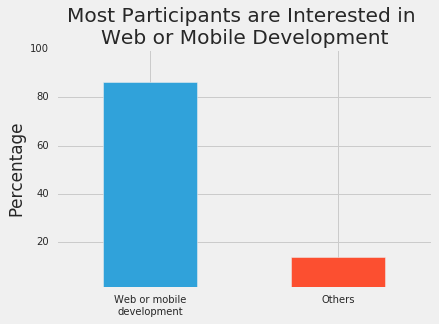

In [3]:
web_or_mobile = survey_data['JobRoleInterest'].dropna().str.contains('Web Developer|Mobile Developer')
freq_table = web_or_mobile.value_counts(normalize = True) * 100

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
freq_table.plot.bar()
plt.ylabel('Percentage')
ax.set_title('Most Participants are Interested in \nWeb or Mobile Development')
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Others'], rotation = 0)
plt.ylim(1,100)
plt.show()
        
        


It turns out that most people in this survey (roughly 86%) are interested in either web or mobile development. These figures offer us a strong reason to consider this sample representative for our population of interest.


## New coders: Locations and Densities

Now we need to figure out what are the best markets to invest money in for advertising our courses. 
Let's find out:
- Where these new coders are located. 
- What are the densities (how many coders there are) for each location.

In [4]:
interests_no_nulls = survey_data[survey_data['JobRoleInterest'].notnull()].copy()
countries = interests_no_nulls['CountryLive'].value_counts()
countries_ = interests_no_nulls['CountryLive'].value_counts(normalize=True)*100

countries_df = pd.DataFrame(data = {'Absolute': countries, 'Percentage': countries_})


countries_df



,Absolute,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


It seems like a good idea to continue our analysis to only four countries: the US, India, the United Kingdom, and Canada. Two reasons for this decision are:

- These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each.

- Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.

## Spending Money for Learning

Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money (in dollars) each student spends per month.

In [5]:
interests_no_nulls['MonthsProgramming'].replace(0, 1,  inplace = True) #avoid dividing by 0
interests_no_nulls['money_per_month'] = interests_no_nulls['MoneyForLearning'] / interests_no_nulls['MonthsProgramming']
interests_no_nulls['money_per_month'].isnull().sum()


675

Let's keep only the rows that don't have null values for the money_per_month and CountryLive columns.

In [6]:
paym_good = interests_no_nulls[interests_no_nulls['money_per_month'].notnull()]
paym_good = interests_no_nulls[interests_no_nulls['CountryLive'].notnull()]

countries_mean = paym_good.groupby('CountryLive').mean()
countries_mean['money_per_month'][['United States of America',
                                   'India',
                                   'United Kingdom',
                                   'Canada']]



CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

The results for the United Kingdom and Canada are surprisingly low relative to the values we see for India. If we considered a few socio-economical metrics (like GDP per capita), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

Let's explore it.

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


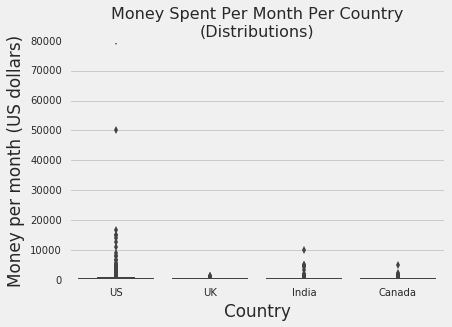

In [7]:
only_selected = paym_good[paym_good['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = only_selected)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

We can see immediately that there's something really off for the US: two persons spend each month \$50000 or more for learning. This is not impossible, but it seems extremely unlikely, so we'll remove every value that goes over \$10,000 per month.

In [8]:
only_selected = only_selected[only_selected['money_per_month'] < 10000]
countries_mean = only_selected.groupby('CountryLive').mean()
countries_mean['money_per_month'][['United States of America',
                                   'India',
                                   'United Kingdom',
                                   'Canada']]


CountryLive
United States of America    155.459187
India                       113.748387
United Kingdom               45.534443
Canada                      113.510961
Name: money_per_month, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


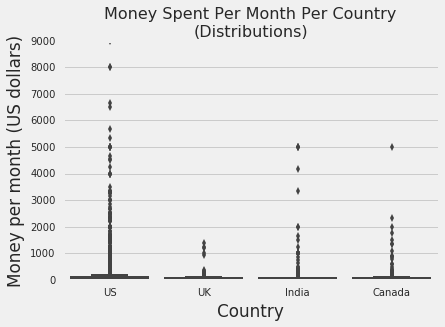

In [9]:
sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = only_selected)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

Let's study more specifically people from India who spent over $ 3000 per month on training. We will use columns "BootcampName",  "MonthsProgramming" and, "money_per_month" to understand if the person participates in the budcamp and how many months he/she has been programming.

In [10]:
india_only = only_selected[(only_selected['money_per_month'] > 3000) &
                      (only_selected['CountryLive'] == 'India')]
india_only[['BootcampName', 'MonthsProgramming', 'money_per_month']]

,BootcampName,MonthsProgramming,money_per_month
1728,NaN,4.0,5000.000000
1755,NaN,15.0,3333.333333
7989,NaN,1.0,5000.000000
8126,NaN,1.0,5000.000000
15587,NaN,24.0,4166.666667


There is no data on bootcamp visits, so it is difficult to tell if the expenses are real. We will remove them all.

In [11]:
only_selected = only_selected.drop(india_only.index)

There are some outliers in the US column who spend < $5000 per month. Let's explore.

In [12]:
usa_only = only_selected[(only_selected['money_per_month'] > 5000) &
                      (only_selected['CountryLive'] == 'United States of America')]
usa_only[['BootcampName', 'MonthsProgramming', 'money_per_month']]

,BootcampName,MonthsProgramming,money_per_month
718,The Coding Boot Camp at UCLA Extension,1.0,8000.000000
1222,The Iron Yard,2.0,6500.000000
3145,Hackbright Academy,3.0,5666.666667
3184,We Can Code IT,1.0,9000.000000
7505,Codeup,3.0,6666.666667
9778,Grand Circus,1.0,8000.000000
13145,Hackbright Academy,3.0,5333.333333



All these people attended the bootcamp, but less than 3 months. Most likely they made a large one-time contribution, so the data is not indicative. We delete them the same way.

In [13]:
only_selected = only_selected.drop(usa_only.index)

Let's take a look at the Canada outlier. 

In [14]:
canada_only = only_selected[(only_selected['money_per_month'] > 3000) &
                      (only_selected['CountryLive'] == 'Canada')]
canada_only[['BootcampName', 'MonthsProgramming', 'money_per_month']]

,BootcampName,MonthsProgramming,money_per_month
13659,Bloc.io,2.0,5000.0


The same situation as in the case of US outliers.

In [15]:
only_selected = only_selected.drop(canada_only.index)

Let's recompute the mean values and generate the final box plots.

In [16]:
countries_mean = only_selected.groupby('CountryLive').mean()
countries_mean['money_per_month'][['United States of America',
                                   'India',
                                   'United Kingdom',
                                   'Canada']]

CountryLive
United States of America    138.982678
India                        65.758763
United Kingdom               45.534443
Canada                       93.065400
Name: money_per_month, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


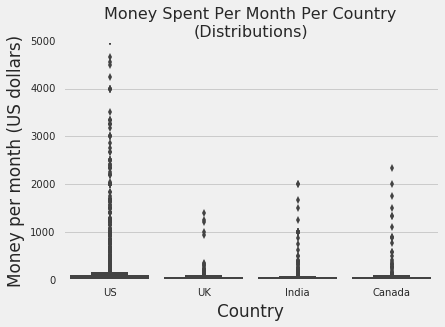

In [17]:
sns.boxplot(y = 'money_per_month', x = 'CountryLive',
            data = only_selected)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
         fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

Before drawing final conclusions, let's take a look at the ratio of the number of potential users in the countries we study.

In [18]:
only_selected['CountryLive'].value_counts(normalize=True)*100

United States of America    74.955048
India                       11.739019
United Kingdom               7.166709
Canada                       6.139224
Name: CountryLive, dtype: float64

## Choosing the Two Best Countries

Obviously, one country we should advertise in is the US. Lots of new coders live there and they are willing to pay a good amount of money each month (roughly \$143).

As for the second country, not everything is crystal clear:
- The average amount that they are willing to spend on training is higher in Canada than in India (\$93 vs \$65). 
- On the other hand, India has a larger number of potential customers compared to Canada (11.7% vs 6.1%).


Most likely, the best solution to this situation is to conduct additional research in Canada and India, obtain additional data for analysis and then decide which market to choose.